In [1]:
from src.datasets import get_paganin_converter

import tifffile
from matplotlib import pyplot as plt
%matplotlib inline

from skimage.filters import gaussian
import numpy as np

from tqdm.auto import tqdm

In [2]:
a = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/001/scan_0002/ffcorr_corr_dead_px/scan_0002.tif')

In [3]:
a.shape

(100, 516, 787)

In [31]:
conv = get_paganin_converter(787, 516)

In [5]:
noise = np.random.normal(0, 0.1, a[0].shape)

In [9]:
s = conv(a[0])

In [29]:
n = conv(np.ones_like(noise))-1

In [15]:
sn = conv(a[0] + noise)

In [11]:
n = conv(noise + 1) - 1

In [12]:
noise2 = gaussian(n, 1)

In [13]:
n2 = conv(noise2)

In [ ]:
noise = np.random.normal(0, 0.1, a[0].shape)

In [41]:
from joblib import Parallel, delayed

In [42]:
def get_one_noise():
    noise = np.random.normal(0, 0.1, a[0].shape)
    return conv(noise + 1) - 1

In [52]:
noises = Parallel(n_jobs=96, verbose=5)(delayed(get_one_noise)() for i in range(10_000))

[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:   46.4s
[Parallel(n_jobs=96)]: Done 258 tasks      | elapsed:   55.3s
[Parallel(n_jobs=96)]: Done 456 tasks      | elapsed:  1.1min
[Parallel(n_jobs=96)]: Done 690 tasks      | elapsed:  1.3min
[Parallel(n_jobs=96)]: Done 960 tasks      | elapsed:  1.5min
[Parallel(n_jobs=96)]: Done 1266 tasks      | elapsed:  1.7min
[Parallel(n_jobs=96)]: Done 1608 tasks      | elapsed:  2.0min
[Parallel(n_jobs=96)]: Done 1986 tasks      | elapsed:  2.3min
[Parallel(n_jobs=96)]: Done 2400 tasks      | elapsed:  2.6min
[Parallel(n_jobs=96)]: Done 2850 tasks      | elapsed:  3.0min
[Parallel(n_jobs=96)]: Done 3336 tasks      | elapsed:  3.3min
[Parallel(n_jobs=96)]: Done 3858 tasks      | elapsed:  3.7min
[Parallel(n_jobs=96)]: Done 4416 tasks      | elapsed:  4.2min
[Parallel(n_jobs=96)]: Done 5010 tasks      | elapsed:  4.6min
[Parallel(n_jobs=96)]: Done 5640 tasks      | 

In [55]:
%%time
noises = np.stack(noises)

CPU times: user 3.19 s, sys: 3.99 s, total: 7.17 s
Wall time: 7.14 s


In [56]:
%%time
tifffile.imwrite('/mnt/data/denoising/paganin_noise_collection.tif', noises)

CPU times: user 0 ns, sys: 7.18 s, total: 7.18 s
Wall time: 7.18 s


In [32]:
noises = []
for i in tqdm(range(10000)):
    

  0%|          | 0/300 [00:00<?, ?it/s]

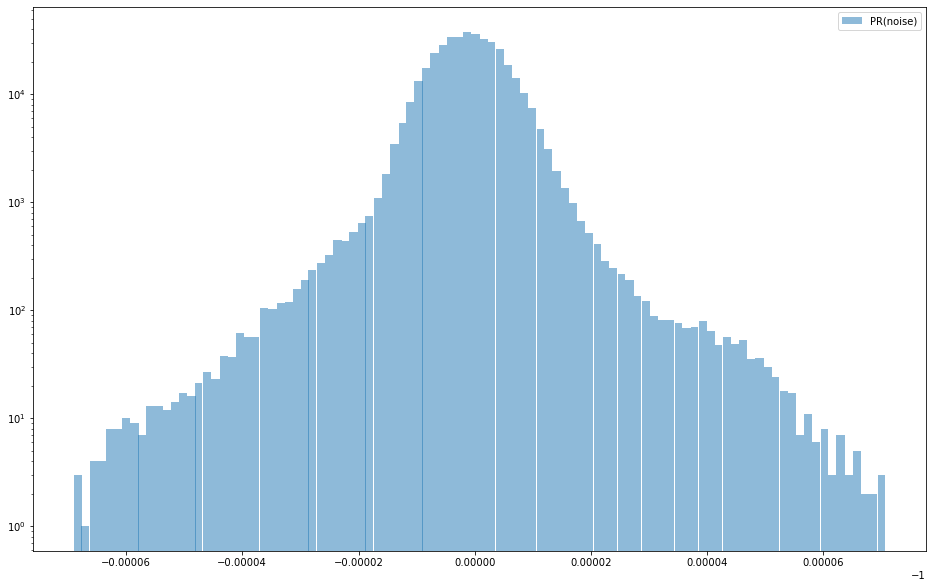

In [24]:
plt.figure(figsize=(16, 10))
# plt.hist(s.flatten(), bins=100, alpha=0.5, log=True, label='PR(signal)')
plt.hist(n.flatten(), bins=100, alpha=0.5, log=True, label='PR(noise)')
# plt.hist(n2.flatten(), bins=100, alpha=0.5, log=True, label='PR(conv(noise))')
# plt.hist(sn.flatten(), bins=100, alpha=0.5, log=True, label='PR(signal+noise)')
plt.legend()
plt.show()

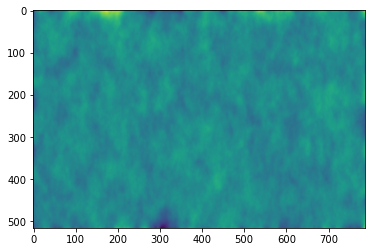

In [19]:
plt.imshow(sn - s)

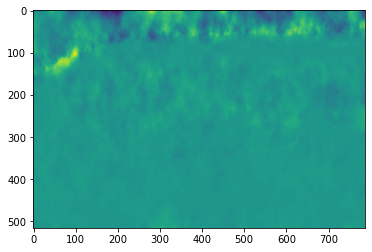

In [20]:
plt.imshow(n - (sn - s))

In [21]:
plt.imshow(np.mean(noises, 0))

NameError: name 'noises' is not defined

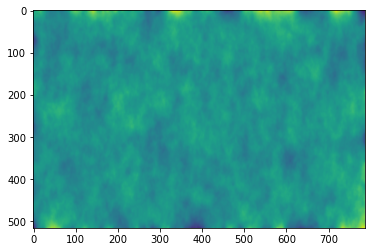

In [30]:
plt.imshow(n)